In [11]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
torch.manual_seed(0)

In [2]:
class f_net(nn.Module):
    def __init__(self):
        super(f_net, self).__init__()
        self.fc1 = nn.Linear(1, 80)
        self.fc2 = nn.Linear(80, 80)
        self.fc3 = nn.Linear(80, 1)
    
    def forward(self, x):
        x = self.fc1(x)
        x = torch.tanh(x)
        x = self.fc2(x)
        x = torch.tanh(x)
        x = self.fc3(x)
        return x

class g_net(nn.Module):
    def __init__(self):
        super(g_net, self).__init__()
        self.fc1 = nn.Linear(1, 80)
        self.fc2 = nn.Linear(80, 80)
        self.fc3 = nn.Linear(80, 1)
    
    def forward(self, x):
        x = self.fc1(x)
        x = torch.tanh(x)
        x = self.fc2(x)
        x = torch.tanh(x)
        x = self.fc3(x)
        return x

## Train $f$ to approximate $x\mapsto x^2$

In [45]:
f = f_net()
x = torch.tensor(np.linspace(-1, 1, 100).reshape(-1, 1)).float()
y = x**2

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(f.parameters(), lr=0.001)

for e in range(500):
    optimizer.zero_grad()
    y_ = f(x)
    loss = criterion(y_, y)
    if e % 1 == 0:
        print(e, loss.item())
    loss.backward()
    optimizer.step()

0 0.10478036105632782
1 0.09360712766647339
2 0.09236199408769608
3 0.09156764298677444
4 0.08977924287319183
5 0.08598712086677551
6 0.08203069865703583
7 0.07889941334724426
8 0.07638224214315414
9 0.07446105778217316
10 0.07252883911132812
11 0.06998740136623383
12 0.06709295511245728
13 0.06411252170801163
14 0.06122000515460968
15 0.05869966372847557
16 0.05648844316601753
17 0.054254621267318726
18 0.05189243331551552
19 0.04935133457183838
20 0.04665936529636383
21 0.044055432081222534
22 0.04164829105138779
23 0.03937063366174698
24 0.037170685827732086
25 0.034906744956970215
26 0.03252482786774635
27 0.03014795295894146
28 0.02784823253750801
29 0.02569059282541275
30 0.02366477996110916
31 0.021651018410921097
32 0.019632522016763687
33 0.017626618966460228
34 0.015711389482021332
35 0.013960659503936768
36 0.012332549318671227
37 0.010793105699121952
38 0.009296492673456669
39 0.007895693182945251
40 0.006646465510129929
41 0.00556457182392478
42 0.004610493313521147
43 0.0

In [4]:
f(torch.tensor(np.array([[0.5]])).float())

tensor([[0.2584]], grad_fn=<AddmmBackward0>)

## Define loss function in terms of $f$

In [83]:
f.eval()
def f_loss(y1, y2):
    return torch.sum((f(y1).detach() + y1 - y2)**2)

## Train $g$ so that $f(g(x)) + g(x) \approx x^2 + x$, that is $g(x) \approx x$

In [84]:
g = g_net()
y = x**2 + x

criterion = f_loss
optimizer = torch.optim.Adam(g.parameters(), lr=0.001)
loss_array = []

for e in range(5000):
    optimizer.zero_grad()
    y_ = g(x)
    loss = criterion(y_, y)
    loss_array.append(loss.item())
    if e % 1 == 0:
        print(e, loss.item())
    loss.backward()
    optimizer.step()

0 63.527931213378906
1 47.07157516479492
2 31.38154411315918
3 21.155988693237305
4 16.83929443359375
5 15.269397735595703
6 13.229599952697754
7 9.92598819732666
8 6.2497687339782715
9 3.282327890396118
10 1.5561667680740356
11 0.9870508313179016
12 1.1254907846450806
13 1.4631315469741821
14 1.6416475772857666
15 1.5251832008361816
16 1.1725239753723145
17 0.759799599647522
18 0.48721596598625183
19 0.4912797808647156
20 0.7862492203712463
21 1.2595881223678589
22 1.7284611463546753
23 2.0298848152160645
24 2.093965530395508
25 1.9621310234069824
26 1.7494570016860962
27 1.5806666612625122
28 1.5358744859695435
29 1.6287224292755127
30 1.8190274238586426
31 2.0458667278289795
32 2.2616302967071533
33 2.4524011611938477
34 2.6394119262695312
35 2.864802360534668
36 3.1700310707092285
37 3.577061414718628
38 4.080700397491455
39 4.655087947845459
40 5.269806861877441
41 5.905820846557617
42 6.561926364898682
43 7.248767852783203
44 7.975076198577881
45 8.734879493713379
46 9.5031089782

384 1.9640520811080933
385 1.9548003673553467
386 1.9455735683441162
387 1.9363718032836914
388 1.9271950721740723
389 1.918043851852417
390 1.9089176654815674
391 1.8998154401779175
392 1.8907382488250732
393 1.881686806678772
394 1.8726598024368286
395 1.863657832145691
396 1.8546805381774902
397 1.8457282781600952
398 1.8367996215820312
399 1.8278958797454834
400 1.8190174102783203
401 1.8101627826690674
402 1.8013322353363037
403 1.7925267219543457
404 1.7837445735931396
405 1.7749865055084229
406 1.7662527561187744
407 1.7575428485870361
408 1.7488560676574707
409 1.7401937246322632
410 1.731554627418518
411 1.7229397296905518
412 1.7143474817276
413 1.7057785987854004
414 1.697232723236084
415 1.6887104511260986
416 1.6802109479904175
417 1.67173433303833
418 1.6632806062698364
419 1.6548492908477783
420 1.6464405059814453
421 1.6380544900894165
422 1.6296898126602173
423 1.621348261833191
424 1.6130282878875732
425 1.6047307252883911
426 1.5964546203613281
427 1.5882008075714111

761 0.49333128333091736
762 0.49260199069976807
763 0.49187448620796204
764 0.4911481738090515
765 0.49042320251464844
766 0.4896998703479767
767 0.48897773027420044
768 0.4882570207118988
769 0.487537682056427
770 0.48681989312171936
771 0.48610371351242065
772 0.485388845205307
773 0.4846749007701874
774 0.48396262526512146
775 0.4832521378993988
776 0.4825427234172821
777 0.48183491826057434
778 0.4811282455921173
779 0.4804231524467468
780 0.47971946001052856
781 0.47901707887649536
782 0.478316068649292
783 0.47761663794517517
784 0.47691863775253296
785 0.47622185945510864
786 0.4755264222621918
787 0.47483253479003906
788 0.4741400480270386
789 0.47344914078712463
790 0.4727592170238495
791 0.4720710515975952
792 0.471384197473526
793 0.470698744058609
794 0.47001469135284424
795 0.4693317413330078
796 0.46865060925483704
797 0.4679710268974304
798 0.4672923684120178
799 0.4666155278682709
800 0.4659394919872284
801 0.46526551246643066
802 0.46459266543388367
803 0.4639213085174

1137 0.3079865872859955
1138 0.30767306685447693
1139 0.3073602020740509
1140 0.3070477247238159
1141 0.3067357838153839
1142 0.30642449855804443
1143 0.3061137795448303
1144 0.3058033883571625
1145 0.30549389123916626
1146 0.3051847815513611
1147 0.30487602949142456
1148 0.3045678436756134
1149 0.30426037311553955
1150 0.3039533495903015
1151 0.3036469519138336
1152 0.30334097146987915
1153 0.30303555727005005
1154 0.3027307689189911
1155 0.3024262487888336
1156 0.3021223843097687
1157 0.3018191456794739
1158 0.30151644349098206
1159 0.3012140393257141
1160 0.300912082195282
1161 0.3006109595298767
1162 0.3003101050853729
1163 0.30000975728034973
1164 0.29971006512641907
1165 0.29941096901893616
1166 0.2991117835044861
1167 0.29881343245506287
1168 0.2985156774520874
1169 0.29821816086769104
1170 0.29792138934135437
1171 0.29762470722198486
1172 0.29732903838157654
1173 0.29703348875045776
1174 0.2967386841773987
1175 0.29644426703453064
1176 0.29614996910095215
1177 0.295856416225433

1514 0.21619130671024323
1515 0.2160046100616455
1516 0.21581822633743286
1517 0.21563199162483215
1518 0.215446338057518
1519 0.2152608335018158
1520 0.21507559716701508
1521 0.21489061415195465
1522 0.2147059440612793
1523 0.21452157199382782
1524 0.2143375724554062
1525 0.21415404975414276
1526 0.21397054195404053
1527 0.21378712356090546
1528 0.21360453963279724
1529 0.21342194080352783
1530 0.21323955059051514
1531 0.21305778622627258
1532 0.21287624537944794
1533 0.2126947045326233
1534 0.21251367032527924
1535 0.21233293414115906
1536 0.21215231716632843
1537 0.21197238564491272
1538 0.2117924839258194
1539 0.21161288022994995
1540 0.21143347024917603
1541 0.21125458180904388
1542 0.21107590198516846
1543 0.2108975201845169
1544 0.21071946620941162
1545 0.21054187417030334
1546 0.21036431193351746
1547 0.21018727123737335
1548 0.21001027524471283
1549 0.2098335474729538
1550 0.20965731143951416
1551 0.209481343626976
1552 0.20930567383766174
1553 0.20913048088550568
1554 0.20895

1905 0.1651555448770523
1906 0.16507598757743835
1907 0.16499671339988708
1908 0.16491758823394775
1909 0.16483865678310394
1910 0.16476012766361237
1911 0.16468164324760437
1912 0.16460351645946503
1913 0.16452552378177643
1914 0.1644478440284729
1915 0.16437028348445892
1916 0.16429293155670166
1917 0.16421575844287872
1918 0.16413895785808563
1919 0.1640622913837433
1920 0.163985937833786
1921 0.16390971839427948
1922 0.16383379697799683
1923 0.16375800967216492
1924 0.16368234157562256
1925 0.16360697150230408
1926 0.16353173553943634
1927 0.16345684230327606
1928 0.16338209807872772
1929 0.16330794990062714
1930 0.16323354840278625
1931 0.1631593257188797
1932 0.16308560967445374
1933 0.16301195323467255
1934 0.16293859481811523
1935 0.16286525130271912
1936 0.16279204189777374
1937 0.16271941363811493
1938 0.16264691948890686
1939 0.16257449984550476
1940 0.16250240802764893
1941 0.16243040561676025
1942 0.16235871613025665
1943 0.16228726506233215
1944 0.16221590340137482
1945 0

2307 0.14792722463607788
2308 0.14791293442249298
2309 0.14789891242980957
2310 0.14788509905338287
2311 0.14787138998508453
2312 0.1478576362133026
2313 0.14784404635429382
2314 0.14783044159412384
2315 0.14781706035137177
2316 0.14780355989933014
2317 0.14779043197631836
2318 0.14777712523937225
2319 0.14776411652565002
2320 0.1477510631084442
2321 0.14773820340633392
2322 0.14772529900074005
2323 0.14771269261837006
2324 0.14770010113716125
2325 0.14768747985363007
2326 0.14767491817474365
2327 0.14766263961791992
2328 0.14765024185180664
2329 0.14763805270195007
2330 0.14762595295906067
2331 0.14761386811733246
2332 0.14760194718837738
2333 0.14759020507335663
2334 0.14757826924324036
2335 0.14756657183170319
2336 0.14755505323410034
2337 0.14754348993301392
2338 0.14753200113773346
2339 0.14752046763896942
2340 0.14750932157039642
2341 0.14749811589717865
2342 0.14748696982860565
2343 0.1474759727716446
2344 0.14746491611003876
2345 0.14745402336120605
2346 0.1474432498216629
2347

2698 0.1433328092098236
2699 0.14330370724201202
2700 0.14327454566955566
2701 0.14324523508548737
2702 0.14321553707122803
2703 0.14318592846393585
2704 0.14315591752529144
2705 0.14312580227851868
2706 0.14309531450271606
2707 0.14306485652923584
2708 0.14303411543369293
2709 0.14300306141376495
2710 0.14297188818454742
2711 0.14294052124023438
2712 0.14290903508663177
2713 0.14287714660167694
2714 0.14284536242485046
2715 0.14281311631202698
2716 0.14278064668178558
2717 0.14274808764457703
2718 0.1427152007818222
2719 0.1426822990179062
2720 0.1426490843296051
2721 0.14261582493782043
2722 0.14258205890655518
2723 0.14254829287528992
2724 0.1425141841173172
2725 0.14247986674308777
2726 0.142445370554924
2727 0.14241063594818115
2728 0.14237573742866516
2729 0.14234080910682678
2730 0.14230553805828094
2731 0.14226983487606049
2732 0.1422341763973236
2733 0.1421981006860733
2734 0.14216214418411255
2735 0.1421254426240921
2736 0.1420890986919403
2737 0.14205186069011688
2738 0.1420

3066 0.11769574880599976
3067 0.11834050714969635
3068 0.11742724478244781
3069 0.116633340716362
3070 0.11685187369585037
3071 0.11720690876245499
3072 0.11697818338871002
3073 0.11621081084012985
3074 0.11609213054180145
3075 0.1164436787366867
3076 0.11626731604337692
3077 0.11584706604480743
3078 0.11554893106222153
3079 0.1156177669763565
3080 0.11571119725704193
3081 0.11534864455461502
3082 0.11506842821836472
3083 0.11502552777528763
3084 0.11500944197177887
3085 0.11491081863641739
3086 0.11459904164075851
3087 0.11444946378469467
3088 0.11445021629333496
3089 0.11433020234107971
3090 0.11417163908481598
3091 0.11395847052335739
3092 0.11385667324066162
3093 0.11382145434617996
3094 0.1136520653963089
3095 0.11349469423294067
3096 0.11334438621997833
3097 0.11324094235897064
3098 0.11316641420125961
3099 0.1129923090338707
3100 0.11285044252872467
3101 0.11272907257080078
3102 0.11261364817619324
3103 0.112514927983284
3104 0.11235098540782928
3105 0.11221768707036972
3106 0.1

3454 0.06160349026322365
3455 0.06146066263318062
3456 0.06131775677204132
3457 0.06117510423064232
3458 0.06103258579969406
3459 0.06089029833674431
3460 0.06074776500463486
3461 0.06060562655329704
3462 0.06046367436647415
3463 0.060321591794490814
3464 0.06017973646521568
3465 0.06003795564174652
3466 0.05989639461040497
3467 0.05975484475493431
3468 0.059613462537527084
3469 0.05947230011224747
3470 0.059331264346838
3471 0.059190165251493454
3472 0.059049177914857864
3473 0.058908481150865555
3474 0.05876786634325981
3475 0.05862731114029884
3476 0.05848703533411026
3477 0.05834674462676048
3478 0.05820666626095772
3479 0.058066681027412415
3480 0.0579267218708992
3481 0.05778717249631882
3482 0.05764756724238396
3483 0.05750805139541626
3484 0.05736877769231796
3485 0.05722953379154205
3486 0.05709058791399002
3487 0.056951671838760376
3488 0.05681286007165909
3489 0.056674156337976456
3490 0.0565357469022274
3491 0.056397318840026855
3492 0.05625924468040466
3493 0.0561210699379

3828 0.022706925868988037
3829 0.02306157909333706
3830 0.023662779480218887
3831 0.02488545887172222
3832 0.026985567063093185
3833 0.030984869226813316
3834 0.037937261164188385
3835 0.05066299065947533
3836 0.07226770371198654
3837 0.10878035426139832
3838 0.16253331303596497
3839 0.23153072595596313
3840 0.28304898738861084
3841 0.27803468704223633
3842 0.1806757152080536
3843 0.06482111662626266
3844 0.021793698891997337
3845 0.07116736471652985
3846 0.13648143410682678
3847 0.1285623162984848
3848 0.06348603218793869
3849 0.021235376596450806
3850 0.045900244265794754
3851 0.08640118688344955
3852 0.07796836644411087
3853 0.036706045269966125
3854 0.021505575627088547
3855 0.045039206743240356
3856 0.06229180842638016
3857 0.04472419619560242
3858 0.02231539599597454
3859 0.02650567889213562
3860 0.04302506893873215
3861 0.04246388003230095
3862 0.026136204600334167
3863 0.020652351900935173
3864 0.030646802857518196
3865 0.035760462284088135
3866 0.027890890836715698
3867 0.0200

4178 0.009178053587675095
4179 0.0112113356590271
4180 0.011298912577331066
4181 0.009496068581938744
4182 0.008724391460418701
4183 0.009808236733078957
4184 0.01050987932831049
4185 0.009517724625766277
4186 0.008620173670351505
4187 0.00903249066323042
4188 0.009692530147731304
4189 0.009422463364899158
4190 0.008657043799757957
4191 0.00859825499355793
4192 0.009104136377573013
4193 0.009156583808362484
4194 0.008706245571374893
4195 0.00842975452542305
4196 0.008648169226944447
4197 0.00887713860720396
4198 0.008665810339152813
4199 0.008384188637137413
4200 0.008395150303840637
4201 0.008565058931708336
4202 0.008573580533266068
4203 0.008363532833755016
4204 0.008259791880846024
4205 0.00834622886031866
4206 0.008405803702771664
4207 0.008331164717674255
4208 0.008199992589652538
4209 0.00818592682480812
4210 0.008251571096479893
4211 0.008240379393100739
4212 0.00816220324486494
4213 0.008097229525446892
4214 0.008107054978609085
4215 0.008135817013680935
4216 0.008098208345472

4536 0.0047981347888708115
4537 0.004723019432276487
4538 0.004829193465411663
4539 0.0048781405203044415
4540 0.004785995464771986
4541 0.004696409683674574
4542 0.004733507055789232
4543 0.004796244669705629
4544 0.0047538685612380505
4545 0.004681989084929228
4546 0.0046786898747086525
4547 0.004718855954706669
4548 0.004719861317425966
4549 0.0046667372807860374
4550 0.00464280229061842
4551 0.004665368236601353
4552 0.00467472430318594
4553 0.004651475232094526
4554 0.004620587918907404
4555 0.004621487110853195
4556 0.004636198747903109
4557 0.004625316243618727
4558 0.004603452980518341
4559 0.0045924135483801365
4560 0.004597129300236702
4561 0.004599178675562143
4562 0.004583398345857859
4563 0.004569726996123791
4564 0.00456746481359005
4565 0.004567977972328663
4566 0.0045630307868123055
4567 0.0045495289377868176
4568 0.004541846923530102
4569 0.004540981259196997
4570 0.00453727412968874
4571 0.004530228674411774
4572 0.004520321264863014
4573 0.004515259526669979
4574 0.0

4933 0.0033117085695266724
4934 0.0033108426723629236
4935 0.0033069835044443607
4936 0.0033014940563589334
4937 0.003298611380159855
4938 0.0032982523553073406
4939 0.0032971608452498913
4940 0.0032943207770586014
4941 0.0032900036312639713
4942 0.0032870443537831306
4943 0.0032856715843081474
4944 0.003284227102994919
4945 0.003282110672444105
4946 0.003278590040281415
4947 0.0032756999135017395
4948 0.003273777663707733
4949 0.003272045636549592
4950 0.003270273096859455
4951 0.0032673696987330914
4952 0.00326466909609735
4953 0.0032623582519590855
4954 0.0032603805884718895
4955 0.0032585603184998035
4956 0.0032560669351369143
4957 0.003253603121265769
4958 0.0032511879689991474
4959 0.0032490496523678303
4960 0.0032471511512994766
4961 0.003244901541620493
4962 0.0032426288817077875
4963 0.0032402321230620146
4964 0.003238044446334243
4965 0.0032359594479203224
4966 0.0032338430173695087
4967 0.0032316772267222404
4968 0.003229444846510887
4969 0.0032271435484290123
4970 0.0032250

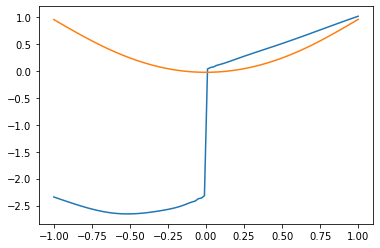

In [85]:
plt.plot(x.detach().numpy()[:, 0], g(x).detach().numpy()[:, 0])
plt.plot(x.detach().numpy()[:, 0], f(x).detach().numpy()[:, 0])
plt.show()

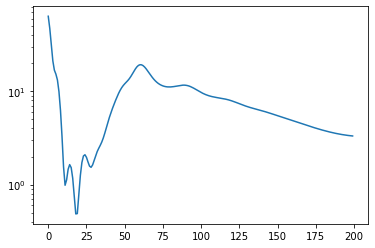

In [86]:
plt.semilogy(np.arange(len(loss_array))[:200], loss_array[:200])